In [1]:
# https://petamind.com/an-example-to-graph-convolutional-network/

from networkx import karate_club_graph, to_numpy_matrix
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{'club': 'Mr. Hi'} {'club': 'Officer'}


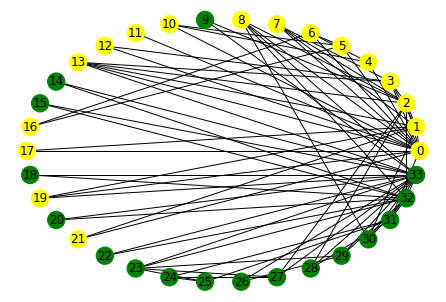

In [2]:
zkc = karate_club_graph()
print(zkc.nodes[0], zkc.nodes[33])

color_map = []
for i in range(len(zkc.nodes)):
  if zkc.nodes[i].get('club') == 'Mr. Hi':
    color_map.append('yellow')
  else:
    color_map.append('green')
#nx.draw_spring(zkc, node_color=color_map, with_labels=True)
nx.draw_circular(zkc, node_color=color_map, with_labels=True)
plt.savefig("zkc_circle.pdf")
plt.show()

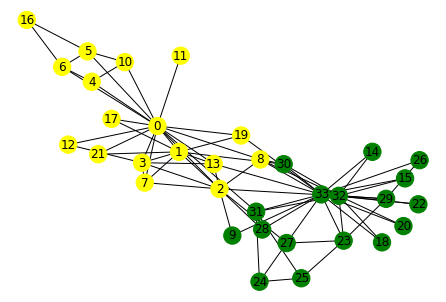

In [3]:
nx.draw_spring(zkc, node_color=color_map, with_labels=True)
plt.savefig("zkc_spring.pdf")
plt.show()

In [4]:
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [5]:
ohe = OneHotEncoder()
X = np.reshape([i for i in np.linspace(1, 34, 34)], (-1, 1))
X = ohe.fit_transform(X).toarray()
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [6]:
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [7]:
#W1 with size 34x4
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4)) 
#W2 with size 4x 2
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [8]:
def relu(x):
  return np.maximum(x, 0)

In [9]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, X, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

print(output.shape, '\n', output)

(34, 2) 
 [[0.21437978 0.        ]
 [0.26672712 0.05085923]
 [0.04334607 0.        ]
 [0.         0.        ]
 [0.02516131 0.        ]
 [0.21535179 0.        ]
 [0.22101226 0.        ]
 [0.         0.        ]
 [0.03336486 0.        ]
 [0.04616786 0.        ]
 [0.05996045 0.        ]
 [0.35190885 0.19994552]
 [0.         0.        ]
 [0.         0.        ]
 [0.00253544 0.        ]
 [0.08928789 0.04048744]
 [0.37722736 0.18533228]
 [0.2481467  0.01600371]
 [0.03302342 0.        ]
 [0.261565   0.11771254]
 [0.01241345 0.        ]
 [0.28995344 0.03948039]
 [0.14886732 0.05760212]
 [0.21140217 0.0284    ]
 [0.41150912 0.1234183 ]
 [0.45743649 0.15977721]
 [0.10444573 0.03647249]
 [0.21837206 0.02401946]
 [0.16615236 0.11090983]
 [0.13945315 0.01933454]
 [0.05799025 0.        ]
 [0.27672516 0.06692631]
 [0.11784452 0.01783895]
 [0.19527833 0.07646168]]


In [10]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

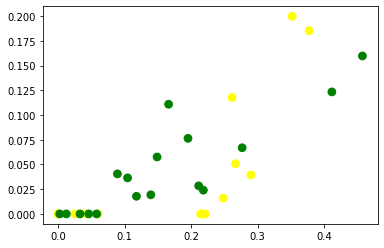

In [11]:
plt.scatter([output[:, 0]], [output[:, 1]], c = color_map, marker='o', s=60)
plt.show()